In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import qmc
import torch.nn as nn
import time
from pyDOE import lhs
from functools import partial  # Higher-order functions and operations on callable objects
from pinns import *
from plotting import *
import warnings
# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

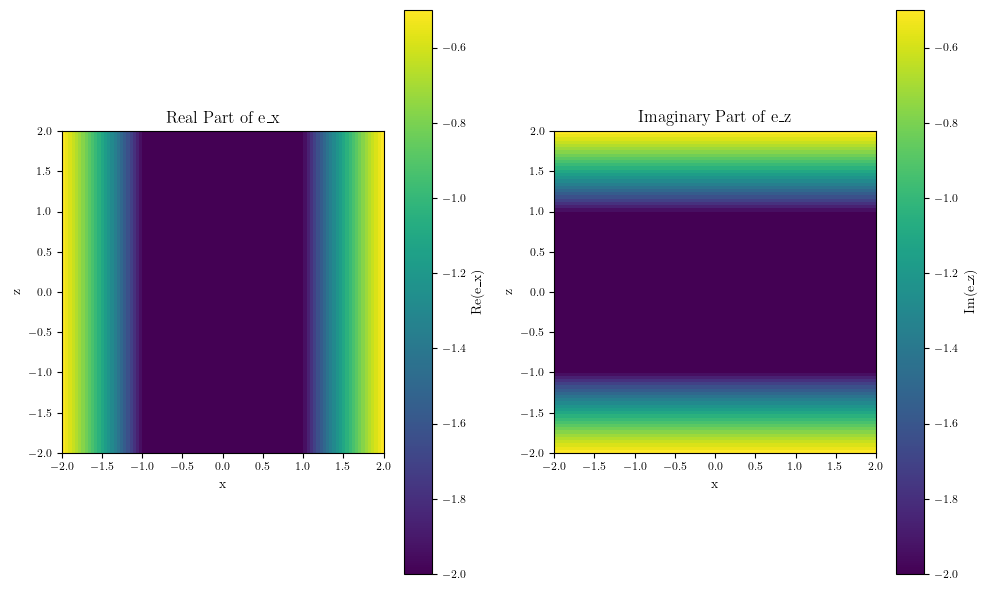

In [19]:
def sigma(lx, lz, a0=0.5, f0=1.0, LPML=1.0):
    """
    Calcula la función de absorción sigma en función de lx, lz, a0, f0 y LPML.
    """
    sigma_x = 2 * np.pi * a0 * f0 * (lx / LPML)**2
    sigma_z = 2 * np.pi * a0 * f0 * (lz / LPML)**2
    return sigma_x, sigma_z

def compute_ex_z(lx, lz, omega):
    """
    Calcula ex y ez utilizando la fórmula dada.
    """
    sigma_x, sigma_z = sigma(lx, lz)
    
    ex = 1 - 1j * sigma_x / omega
    ez = 1 - 1j * sigma_z / omega
    
    return ex, ez

# Parámetros del dominio
domain_range = np.linspace(-2, 2, 100)  # Malla de puntos entre -2 y 2
LX, LZ = np.meshgrid(domain_range, domain_range)  # Crear una malla 2D

a0 = 0.5 # Factor de atenuación

# Grosor de PML
LPML = 1.0

# Calcular distancias lx y lz para el PML
lx = np.clip(LX + 2, 0, LPML)  # PML en el borde izquierdo
lx += np.clip(2 - LX, 0, LPML)  # PML en el borde derecho
lz = np.clip(LZ + 2, 0, LPML)  # PML en el borde inferior
lz += np.clip(2 - LZ, 0, LPML)  # PML en el borde superior

# Frecuencia angular
f0 = 1.0  # Frecuencia en Hz
omega = 2 * np.pi * f0  # Frecuencia angular

# Calcular ex y ez
ex, ez = compute_ex_z(lx, lz, omega)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Real Part of e_x")
plt.imshow(np.imag(ex), extent=(-2, 2, -2, 2), origin='lower', cmap='viridis')
plt.colorbar(label='Re(e_x)')
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(1, 2, 2)
plt.title("Imaginary Part of e_z")
plt.imshow(np.imag(ez), extent=(-2, 2, -2, 2), origin='lower', cmap='viridis')
plt.colorbar(label='Im(e_z)')
plt.xlabel('x')
plt.ylabel('z')

plt.tight_layout()
plt.show()

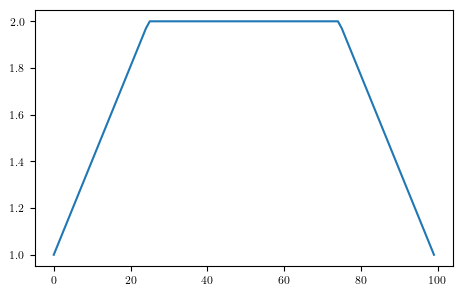

In [17]:
plt.plot(lz[:,0])